In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_utils import dafx_from_name
from sklearn.feature_selection import mutual_info_regression

In [126]:
sns.set(style="white")

In [127]:
VMIN = 0
VMAX = 3.32

In [128]:
DATA_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/param_extraction"
FIG_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/param_entropy"
DAFX = "delay"

In [129]:
emb = np.load(f"{DATA_DIR}/{DAFX}_projection.npy")
params = np.load(f"{DATA_DIR}/{DAFX}_settings.npy")

In [130]:
idx_param_map = dafx_from_name(f"mda Delay").idx_to_param_map
mi_matrix = np.array([mutual_info_regression(emb, params[:, i]) for i in range(params.shape[1])])
df = pd.DataFrame(mi_matrix, index=[idx_param_map[i] for i in range(params.shape[1])])

In [131]:
df

,0,1
l_delay_ms,0.579349,0.789224
r_delay,0.222316,0.206935
feedback,0.030767,0.019973
fb_tone_lo_hi,0.047116,0.031201
fb_mix,0.318376,0.204477


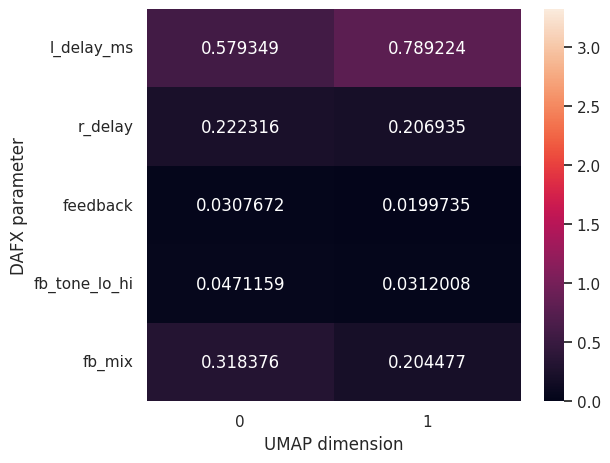

In [132]:
sns.heatmap(df, annot=True, fmt='g', vmin=VMIN, vmax=VMAX)

plt.xlabel("UMAP dimension")
plt.ylabel("DAFX parameter")

plt.tight_layout()

plt.savefig(f"{FIG_DIR}/{DAFX}_entropy.png")